<a href="https://colab.research.google.com/github/GhoffarFitassin/ML_2025-2026/blob/main/TG6_2341720035_Ghoffar_Abdul_Ja'far.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JS06 - ANN (Approximate Nearest Neighbors)

## Praktikum

### Praktikum 1

In [1]:
!pip install annoy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 16.572 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak: [np.float64(0.0), np.float64(13.237907813420613), np.float64(54.73661775436655)]
Waktu Annoy: 0.1199 ms


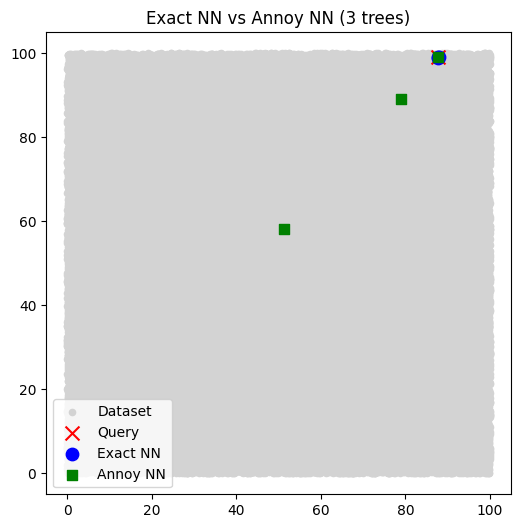

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

TREES = 3

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(TREES)  # gunakan jumlah tree dari variabel

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title(f"Exact NN vs Annoy NN ({TREES} trees)")
plt.show()

| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN vs ANN            | Waktu komputasi Vs |
| ---------------- | ---- | ----------- | ------------------------------------------ | ------------------ |
| Euclidean        | 3    | 1000        | [219 898 593], [219 898 593]               | 0.0 , 0.0          |
| Euclidean        | 8    | 1000        | [219 898 593], [219 898 593]               | 0.0 , 0.0          |
| Euclidean        | 3    | 100,000     | [64040 64186 88792], [64040, 64186, 88792] | 4.6554 , 0.0       |
| Angular          | 3    | 1000        | [219 898 593], [219, 429, 540]             | 0.0 , 0.0          |
| Angular          | 8    | 1000        | [219 898 593], [219, 429, 540]             | 0.0 , 0.0          |
| Angular          | 3    | 100,000     | [64040 64186 88792], [65999, 7452, 41684]  | 5.9988 , 0.0       |


20 fitur dan berisi 1 juta lagu (fyi, spotify memiliki 150 jutaan track), isikan hasilnya.

In [3]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")


Exact NN result: [269630 804377 312985 776031 370166]
Exact NN time: 0.142 seconds
Annoy result: [666661, 782520, 392973, 130976, 432802]
Annoy time: 0.0 seconds


| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN vs ANN                                               | Waktu komputasi Vs |
| ---------------- | ---- | ----------- | ----------------------------------------------------------------------------- | ------------------ |
| Euclidean        | 8    | 1000000     | [269630 804377 312985 776031 370166], [732765, 99627, 675365, 290409, 455509] | 0.063 , 0.0        |
| Angular          | 8    | 1000000     | [ 45743 910736 719534 416455 143689], [948704, 93503, 488511, 936700, 948910] | 0.068 , 0.0        |


### Pertanyaannya: Kenapa code dibagian build index tidak dihitung waktunya?

karena proses building dan searching dianggap sebagai dua tahap yang terpisah dengan tujuan yang berbeda.

### Praktikum 2

In [4]:
!pip install faiss-cpu -q
# !pip install faiss-gpu -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 65.3 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00010776519775390625
Waktu IVF+PQ: 0.00015020370483398438


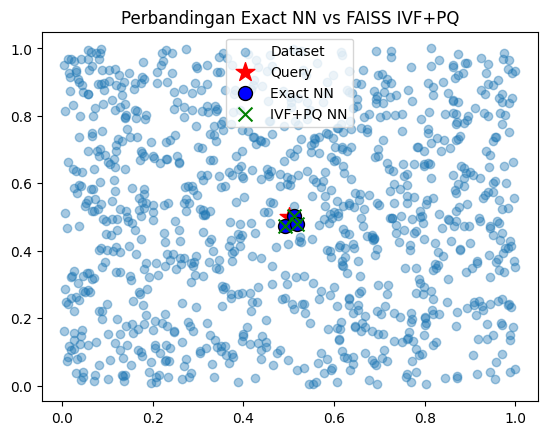

In [5]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


In [ ]:
import numpy as np
import faiss
import time
import pandas as pd

def run_experiment(n_data, dim, metric_type):
    """
    Fungsi untuk menjalankan satu skenario eksperimen FAISS.

    Args:
        n_data (int): Jumlah titik data dalam dataset.
        dim (int): Dimensi dari setiap titik data.
        metric_type (str): 'L2' untuk Euclidean atau 'IP' untuk Inner Product.

    Returns:
        dict: Kamus berisi hasil metrik performa.
    """
    print(f"Running experiment: {n_data} data, {dim}D, Metric: {metric_type}...")

    # 1. Generate Dataset
    np.random.seed(42)
    X = np.random.rand(n_data, dim).astype('float32')
    query = np.random.rand(1, dim).astype('float32')
    k = 5  # Kita akan mencari 5 tetangga terdekat

    # Normalisasi data jika menggunakan Inner Product (penting untuk perbandingan seperti Cosine Similarity)
    if metric_type == 'IP':
        faiss.normalize_L2(X)
        faiss.normalize_L2(query)

    # 2. Exact NN (IndexFlat)
    if metric_type == 'L2':
        index_flat = faiss.IndexFlatL2(dim)
    else: # 'IP'
        index_flat = faiss.IndexFlatIP(dim)

    index_flat.add(X)
    start_time = time.time()
    D_flat, I_flat = index_flat.search(query, k)
    time_flat = time.time() - start_time

    # 3. Approximate NN (IndexIVFPQ)
    # Menentukan parameter yang masuk akal
    nlist = min(int(np.sqrt(n_data)), 256) # Jumlah cluster, dibatasi agar tidak terlalu banyak
    m = 1 if dim % 2 != 0 else 2 # Sub-quantizer, m harus bisa membagi dim
    if dim == 2: m=2 # Untuk 2D, m=2 lebih optimal
    if dim == 5: m=1 # Untuk 5D, m harus 1 atau 5

    if metric_type == 'L2':
        quantizer = faiss.IndexFlatL2(dim)
        index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)
    else: # 'IP'
        quantizer = faiss.IndexFlatIP(dim)
        # Untuk IP, metrik harus didefinisikan juga di quantizer
        index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8, faiss.METRIC_INNER_PRODUCT)

    # Waktu Build (Train + Add)
    start_build = time.time()
    index_ivfpq.train(X[:min(n_data, 100000)]) # Training hanya butuh sampel data
    index_ivfpq.add(X)
    time_build = time.time() - start_build

    # Waktu Search
    index_ivfpq.nprobe = 5 # Berapa cluster tetangga yang akan dicari
    start_time = time.time()
    D_ivfpq, I_ivfpq = index_ivfpq.search(query, k)
    time_ivfpq = time.time() - start_time

    # 4. Hitung Recall (Akurasi)
    # Seberapa banyak tetangga terdekat yang benar ditemukan oleh metode approximate
    true_neighbors = set(I_flat[0])
    approx_neighbors = set(I_ivfpq[0])
    recall = len(true_neighbors.intersection(approx_neighbors)) / k

    return {
        "Ukuran Data": n_data,
        "Dimensi": dim,
        "Metrik Jarak": metric_type,
        "Waktu Build (IVFPQ) (s)": round(time_build, 6),
        "Waktu Search (Exact) (s)": round(time_flat, 6),
        "Waktu Search (IVFPQ) (s)": round(time_ivfpq, 6),
        f"Recall@{k}": recall
    }

# --- Main Execution ---
scenarios = [
    (1000, 2, 'L2'),
    (1000, 5, 'L2'),
    (1000000, 2, 'L2'),
    (1000000, 5, 'L2'),
    (1000, 2, 'IP'),
    (1000, 5, 'IP'),
    (1000000, 2, 'IP'),
    (1000000, 5, 'IP'),
]

results = []
for n_data, dim, metric in scenarios:
    results.append(run_experiment(n_data, dim, metric))

# Tampilkan hasil dalam tabel pandas
df_results = pd.DataFrame(results)
print("\n--- Hasil Eksperimen ---")
print(df_results.to_string())

| Ukuran Data | Dimensi | Metrik Jarak | Waktu Build (IVFPQ) (s) | Waktu Search (Exact) (s) | Waktu Search (IVFPQ) (s) | Recall@5 |
| :---------: | :-----: | :----------: | :---------------------: | :----------------------: | :----------------------: | :------: |
|    1000     |    2    |      L2      |        0.004998         |         0.000000         |          0.000           |   1.0    |
|    1000     |    5    |      L2      |        0.004001         |         0.000000         |          0.000           |   0.8    |
|   1000000   |    2    |      L2      |        0.408952         |         0.003002         |          0.000           |   0.8    |
|   1000000   |    5    |      L2      |        0.430403         |         0.004002         |          0.000           |   0.2    |
|    1000     |    2    |      IP      |        0.005999         |         0.000000         |          0.000           |   0.4    |
|    1000     |    5    |      IP      |        0.004000         |         0.001001         |          0.000           |   0.2    |
|   1000000   |    2    |      IP      |        0.771267         |         0.002028         |          0.001           |   0.0    |
|   1000000   |    5    |      IP      |        0.693971         |         0.002999         |          0.000           |   0.0    |


### Praktikum 3

In [6]:
!pip install hnswlib -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [7]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.039118289947509766 detik

=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.00018024444580078125 detik


In [8]:
import hnswlib
import numpy as np
import time
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def run_experiment(n_data, dim, metric_type):
    """
    Fungsi untuk menjalankan satu skenario eksperimen HNSW vs Brute-Force.

    Args:
        n_data (int): Jumlah titik data.
        dim (int): Dimensi data.
        metric_type (str): 'l2' untuk Euclidean atau 'ip' untuk Inner Product.

    Returns:
        dict: Kamus berisi hasil metrik performa.
    """
    print(f"Running experiment: {n_data} data, {dim}D, Metric: {metric_type}...")

    # 1. Generate Dataset
    np.random.seed(42)
    data = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)
    k = 5 # Mencari 5 tetangga terdekat

    # Untuk Inner Product, normalisasi data sangat penting
    # agar setara dengan Cosine Similarity.
    if metric_type == 'ip':
        norm_data = np.linalg.norm(data, axis=1)
        data = data / norm_data[:, np.newaxis]
        norm_query = np.linalg.norm(query, axis=1)
        query = query / norm_query[:, np.newaxis]
        sklearn_metric = 'cosine'
    else:
        sklearn_metric = 'euclidean'


    # 2. Exact NN (Brute Force)
    nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=sklearn_metric)
    nn.fit(data)
    start_time = time.time()
    _, indices_exact = nn.kneighbors(query)
    time_exact = time.time() - start_time


    # 3. HNSW (Approximate NN)
    p = hnswlib.Index(space=metric_type, dim=dim)

    # Waktu Build
    start_build = time.time()
    p.init_index(max_elements=n_data, ef_construction=200, M=16)
    p.add_items(data)
    time_build = time.time() - start_build

    # Waktu Search
    p.set_ef(50)
    start_search = time.time()
    indices_hnsw, _ = p.knn_query(query, k=k)
    time_hnsw = time.time() - start_search

    # 4. Hitung Recall (Akurasi)
    true_neighbors = set(indices_exact[0])
    approx_neighbors = set(indices_hnsw[0])
    recall = len(true_neighbors.intersection(approx_neighbors)) / k

    return {
        "Ukuran Data": n_data,
        "Dimensi": dim,
        "Metrik Jarak": metric_type.upper(),
        "Waktu Build (HNSW) (s)": round(time_build, 6),
        "Waktu Search (Exact) (s)": round(time_exact, 6),
        "Waktu Search (HNSW) (s)": round(time_hnsw, 6),
        f"Recall@{k}": recall
    }

# --- Eksekusi Semua Skenario ---
scenarios = [
    (1000, 2, 'l2'),
    (1000, 5, 'l2'),
    (1000000, 2, 'l2'),
    (1000000, 5, 'l2'),
    (1000, 2, 'ip'),
    (1000, 5, 'ip'),
    (1000000, 2, 'ip'),
    (1000000, 5, 'ip'),
]

results = []
for n_data, dim, metric in scenarios:
    results.append(run_experiment(n_data, dim, metric))

df_results = pd.DataFrame(results)
print("\n--- Hasil Eksperimen ---")
# Konversi ke Markdown
md_table = df_results.to_markdown(index=False)
print(md_table)

Running experiment: 1000 data, 2D, Metric: l2...
Running experiment: 1000 data, 5D, Metric: l2...
Running experiment: 1000000 data, 2D, Metric: l2...
Running experiment: 1000000 data, 5D, Metric: l2...
Running experiment: 1000 data, 2D, Metric: ip...
Running experiment: 1000 data, 5D, Metric: ip...
Running experiment: 1000000 data, 2D, Metric: ip...
Running experiment: 1000000 data, 5D, Metric: ip...

--- Hasil Eksperimen ---
|   Ukuran Data |   Dimensi | Metrik Jarak   |   Waktu Build (HNSW) (s) |   Waktu Search (Exact) (s) |   Waktu Search (HNSW) (s) |   Recall@5 |
|--------------:|----------:|:---------------|-------------------------:|---------------------------:|--------------------------:|-----------:|
|          1000 |         2 | L2             |                 0.04842  |                   0.000921 |                  6.7e-05  |          1 |
|          1000 |         5 | L2             |                 0.052075 |                   0.000592 |                  7.1e-05  |        

|   Ukuran Data |   Dimensi | Metrik Jarak   |   Waktu Build (HNSW) (s) |   Waktu Search (Exact) (s) |   Waktu Search (HNSW) (s) |   Recall@5 |
|--------------:|----------:|:---------------|-------------------------:|---------------------------:|--------------------------:|-----------:|
|          1000 |         2 | L2             |                 0.04842  |                   0.000921 |                  6.7e-05  |          1 |
|          1000 |         5 | L2             |                 0.052075 |                   0.000592 |                  7.1e-05  |          1 |
|       1000000 |         2 | L2             |               111.11     |                   0.025776 |                  0.000521 |          1 |
|       1000000 |         5 | L2             |               187.372    |                   0.034627 |                  0.000137 |          1 |
|          1000 |         2 | IP             |                 0.050756 |                   0.005114 |                  6.8e-05  |          1 |
|          1000 |         5 | IP             |                 0.052264 |                   0.001472 |                  9.1e-05  |          1 |
|       1000000 |         2 | IP             |               164.057    |                   0.033563 |                  0.00016  |          0 |
|       1000000 |         5 | IP             |               155.952    |                   0.143074 |                  0.000274 |          1 |

### Praktikum 4

In [9]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 21.876081228256226 detik
Query time: 0.0002772808074951172 detik
Neighbors: [57442, 369591, 406820, 890823, 244484] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.008074522018432617 detik
Query time: 0.006323337554931641 detik
Neighbors: [ 57442 369591 406820 890823 244484] ...

=== HNSW (hnswlib) ===
Build time: 166.97459149360657 detik
Query time: 0.0002892017364501953 detik
Neighbors: [ 57442 369591 406820 890823 244484] ...


In [10]:
import numpy as np
import time
import pandas as pd
from annoy import AnnoyIndex
import faiss
import hnswlib

def run_all_experiments(n_data, dim, k):
    """
    Fungsi untuk menjalankan perbandingan Annoy, FAISS (Flat), dan HNSWlib
    untuk metrik L2 dan Inner Product.
    """
    print(f"Menyiapkan dataset: {n_data} data, {dim}D...")

    # Buat dataset
    np.random.seed(42)
    X = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)

    results = []

    # ==========================
    # Skenario 1: L2 (Euclidean)
    # ==========================
    print("\n--- Menjalankan Eksperimen Metrik L2 (Euclidean) ---")

    # --- Annoy ---
    ann_index = AnnoyIndex(dim, 'euclidean')
    start = time.time()
    for i in range(n_data):
        ann_index.add_item(i, X[i])
    ann_index.build(10) # 10 trees
    build_time = time.time() - start
    start = time.time()
    ann_index.get_nns_by_vector(query[0], k)
    query_time = time.time() - start
    results.append({"Library": "Annoy", "Metrik Jarak": "L2", "Waktu Build (s)": build_time, "Waktu Query (s)": query_time})

    # --- FAISS (IndexFlatL2) ---
    faiss_index = faiss.IndexFlatL2(dim)
    start = time.time()
    faiss_index.add(X)
    build_time = time.time() - start
    start = time.time()
    faiss_index.search(query, k)
    query_time = time.time() - start
    results.append({"Library": "FAISS (Flat)", "Metrik Jarak": "L2", "Waktu Build (s)": build_time, "Waktu Query (s)": query_time})

    # --- HNSW (hnswlib) ---
    hnsw_index = hnswlib.Index(space='l2', dim=dim)
    start = time.time()
    hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
    hnsw_index.add_items(X)
    build_time = time.time() - start
    hnsw_index.set_ef(50)
    start = time.time()
    hnsw_index.knn_query(query, k=k)
    query_time = time.time() - start
    results.append({"Library": "HNSWlib", "Metrik Jarak": "L2", "Waktu Build (s)": build_time, "Waktu Query (s)": query_time})

    # ==============================
    # Skenario 2: Inner Product (IP)
    # ==============================
    print("\n--- Menjalankan Eksperimen Metrik Inner Product ---")
    # PENTING: Normalisasi data untuk perbandingan IP yang adil (setara Cosine Similarity)
    X_norm = X.copy()
    query_norm = query.copy()
    faiss.normalize_L2(X_norm)
    faiss.normalize_L2(query_norm)

    # --- Annoy (menggunakan 'angular' untuk Cosine/IP) ---
    ann_index_ip = AnnoyIndex(dim, 'angular')
    start = time.time()
    for i in range(n_data):
        ann_index_ip.add_item(i, X_norm[i])
    ann_index_ip.build(10)
    build_time = time.time() - start
    start = time.time()
    ann_index_ip.get_nns_by_vector(query_norm[0], k)
    query_time = time.time() - start
    results.append({"Library": "Annoy", "Metrik Jarak": "IP", "Waktu Build (s)": build_time, "Waktu Query (s)": query_time})

    # --- FAISS (IndexFlatIP) ---
    faiss_index_ip = faiss.IndexFlatIP(dim)
    start = time.time()
    faiss_index_ip.add(X_norm)
    build_time = time.time() - start
    start = time.time()
    faiss_index_ip.search(query_norm, k)
    query_time = time.time() - start
    results.append({"Library": "FAISS (Flat)", "Metrik Jarak": "IP", "Waktu Build (s)": build_time, "Waktu Query (s)": query_time})

    # --- HNSW (hnswlib) ---
    hnsw_index_ip = hnswlib.Index(space='ip', dim=dim)
    start = time.time()
    hnsw_index_ip.init_index(max_elements=n_data, ef_construction=200, M=16)
    hnsw_index_ip.add_items(X_norm)
    build_time = time.time() - start
    hnsw_index_ip.set_ef(50)
    start = time.time()
    hnsw_index_ip.knn_query(query_norm, k=k)
    query_time = time.time() - start
    results.append({"Library": "HNSWlib", "Metrik Jarak": "IP", "Waktu Build (s)": build_time, "Waktu Query (s)": query_time})

    # Tampilkan hasil
    df = pd.DataFrame(results)
    print("\n--- Hasil Eksperimen ---")
    print(df.round(6).to_markdown(index=False))


# --- Jalankan Eksperimen ---
run_all_experiments(n_data=1_000_000, dim=5, k=10)

Menyiapkan dataset: 1000000 data, 5D...

--- Menjalankan Eksperimen Metrik L2 (Euclidean) ---

--- Menjalankan Eksperimen Metrik Inner Product ---

--- Hasil Eksperimen ---
| Library      | Metrik Jarak   |   Waktu Build (s) |   Waktu Query (s) |
|:-------------|:---------------|------------------:|------------------:|
| Annoy        | L2             |         19.8599   |          0.000156 |
| FAISS (Flat) | L2             |          0.007411 |          0.005997 |
| HNSWlib      | L2             |        157.114    |          0.000199 |
| Annoy        | IP             |         25.8728   |          0.000171 |
| FAISS (Flat) | IP             |          0.007081 |          0.011553 |
| HNSWlib      | IP             |        145.297    |          0.000187 |


| Library      | Metrik Jarak   |   Waktu Build (s) |   Waktu Query (s) |
|:-------------|:---------------|------------------:|------------------:|
| Annoy        | L2             |         19.8599   |          0.000156 |
| FAISS (Flat) | L2             |          0.007411 |          0.005997 |
| HNSWlib      | L2             |        157.114    |          0.000199 |
| Annoy        | IP             |         25.8728   |          0.000171 |
| FAISS (Flat) | IP             |          0.007081 |          0.011553 |
| HNSWlib      | IP             |        145.297    |          0.000187 |

### Praktikum 5

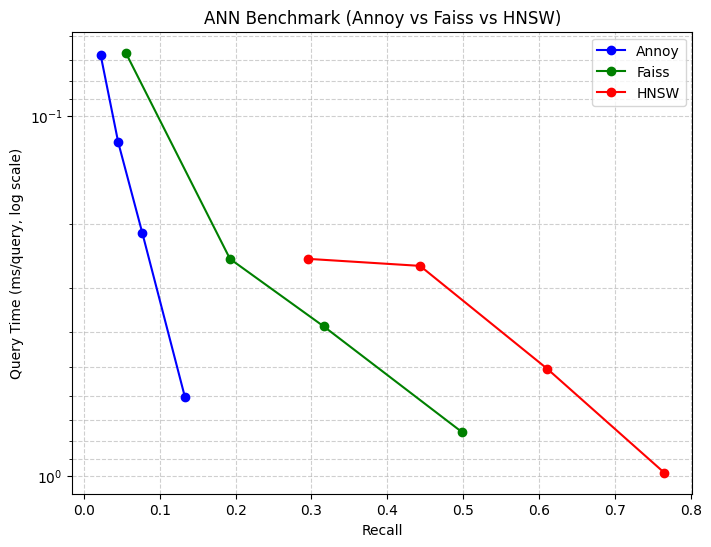

In [11]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

### Praktikum 6

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bwandowando/spotify-songs-with-attributes-and-lyrics")

print("Path to dataset files:", path)

!pip install -q annoy faiss-cpu hnswlib

100%|██████████| 894M/894M [00:11<00:00, 84.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/versions/19


In [13]:
import pandas as pd
import numpy as np
import os
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from joblib import Parallel, delayed
from sklearn.preprocessing import StandardScaler

# Use all available CPU cores where possible
n_cores = os.cpu_count() or 1
os.environ.setdefault('OMP_NUM_THREADS', str(n_cores))
os.environ.setdefault('OPENBLAS_NUM_THREADS', str(n_cores))
os.environ.setdefault('MKL_NUM_THREADS', str(n_cores))
# Tell faiss to use multiple threads (if built with OpenMP)
try:
    faiss.omp_set_num_threads(n_cores)
except Exception:
    pass

# -------------------------------
# Load dataset (drop NaNs in chosen features)
# -------------------------------
df = pd.read_csv(f'{path}/songs_with_attributes_and_lyrics.csv')  # ganti path sesuai lokasi file
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df = df[features].dropna().reset_index(drop=True)
X = df.values

# Standardize and cast to float32 (required by faiss/hnswlib)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).astype(np.float32)

n = X_scaled.shape[0]
k = 10  # jumlah nearest neighbors
# To keep this runnable on limited RAM, sample up to 1000 query points
n_queries = min(1000, n)
rng = np.random.default_rng(42)
query_idx = rng.choice(n, size=n_queries, replace=False)
# Xq = X_scaled[query_idx]
Xq = X_scaled

# -------------------------------
# Exact Nearest Neighbor (brute-force) - only for the sampled queries
# -------------------------------
t0 = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean', n_jobs=-1)
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(Xq)
time_exact = time.time() - t0
print(f"Exact NN (queries={n_queries}) done in {time_exact:.3f} s")

# -------------------------------
# Annoy (build + query on sampled points)
# -------------------------------
t0 = time.time()
fdim = X_scaled.shape[1]
index_annoy = AnnoyIndex(fdim, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v.tolist())
n_trees = 50
index_annoy.build(n_trees)
t_build_annoy = time.time() - t0

tq = time.time()
# Annoy: parallelize queries using joblib (threading) to utilize multiple cores
def _query_annoy(v):
    return index_annoy.get_nns_by_vector(v.tolist(), k)
idx_annoy = Parallel(n_jobs=n_cores, prefer='threads')(delayed(_query_annoy)(v) for v in Xq)
time_query_annoy = time.time() - tq
print(f"Annoy build: {t_build_annoy:.3f} s, query all: {time_query_annoy:.3f} s")

# -------------------------------
# HNSW (hnswlib)
# -------------------------------
t0 = time.time()
p = hnswlib.Index(space='l2', dim=fdim)
p.init_index(max_elements=n, ef_construction=200, M=16)
p.add_items(X_scaled)
p.set_ef(200)
t_build_hnsw = time.time() - t0

tq = time.time()
# hnswlib supports num_threads in knn_query
idx_hnsw, dist_hnsw = p.knn_query(Xq, k=k, num_threads=n_cores)
time_query_hnsw = time.time() - tq
print(f"HNSW build: {t_build_hnsw:.3f} s, query all: {time_query_hnsw:.3f} s")

# -------------------------------
# FAISS IVF (train on full set, query sampled points)
# -------------------------------
t0 = time.time()
quantizer = faiss.IndexFlatL2(fdim)
nlist = 100
index_faiss = faiss.IndexIVFFlat(quantizer, fdim, nlist, faiss.METRIC_L2)
# FAISS requires float32 and contiguous arrays
index_faiss.train(np.ascontiguousarray(X_scaled))
index_faiss.add(np.ascontiguousarray(X_scaled))
index_faiss.nprobe = 10
t_build_faiss = time.time() - t0

tq = time.time()
# FAISS can use multiple threads via set_num_threads if available
try:
    faiss.omp_set_num_threads(n_cores)
except Exception:
    pass
D_faiss, idx_faiss = index_faiss.search(np.ascontiguousarray(Xq), k)
time_query_faiss = time.time() - tq
print(f"FAISS build: {t_build_faiss:.3f} s, query all: {time_query_faiss:.3f} s")

# -------------------------------
# Evaluate recall@k for each ANN vs exact
# -------------------------------
def recall_at_k(true_idx, pred_idx, k):
    # true_idx: (n_queries, k), pred_idx: iterable of length n_queries with lists/arrays
    total = 0.0
    n = len(true_idx)
    for t, p in zip(true_idx, pred_idx):
        pset = set(p.tolist() if hasattr(p, 'tolist') else p)
        total += len(pset.intersection(set(t[:k]))) / float(k)
    return total / n

rec_annoy = recall_at_k(idx_exact, idx_annoy, k)
rec_hnsw = recall_at_k(idx_exact, idx_hnsw, k)
rec_faiss = recall_at_k(idx_exact, idx_faiss, k)

print('\nSummary (build time | query time for sampled points | recall@k)')
print(f"Exact:  - | {time_exact:.3f} s (queries only) | recall=1.00")
print(f"Annoy:  {t_build_annoy:.3f} s | {time_query_annoy:.3f} s | recall@{k}={rec_annoy:.4f}")
print(f"HNSW:   {t_build_hnsw:.3f} s | {time_query_hnsw:.3f} s | recall@{k}={rec_hnsw:.4f}")
print(f"FAISS:  {t_build_faiss:.3f} s | {time_query_faiss:.3f} s | recall@{k}={rec_faiss:.4f}")

# show top-5 neighbors for the first sampled query (original dataset index)
qid = query_idx[0]
print("\nTop-5 neighbors for first sampled query (dataset index = {})".format(int(qid)))
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")

Exact NN (queries=1000) done in 3625.344 s
Annoy build: 72.161 s, query all: 256.429 s
HNSW build: 170.371 s, query all: 139.948 s
FAISS build: 0.376 s, query all: 681.745 s

Summary (build time | query time for sampled points | recall@k)
Exact:  - | 3625.344 s (queries only) | recall=1.00
Annoy:  72.161 s | 256.429 s | recall@10=0.9945
HNSW:   170.371 s | 139.948 s | recall@10=0.9955
FAISS:  0.376 s | 681.745 s | recall@10=0.9982

Top-5 neighbors for first sampled query (dataset index = 287796)
Exact NN: [     0 394553 764272 837727 749223]
Annoy:    [0, 394553, 764272, 837727, 749223]
HNSW:     [     0 394553 764272 837727 749223]
FAISS:    [     0 394553 764272 837727 749223]


#### Buat dan tuliskan analisa anda terhadap code diatas.

Code tersebut bertujuan membandingkan performa kecepatan dan hasil dari beberapa algoritma Nearest Neighbor Search pada dataset lirik lagu Spotify.
Hasil dari code diatas:

| Aspek | Annoy | HNSW | FAISS |
|:-----|:-----|:-----|:-----|
| Kecepatan Query |	Sedang |	Tercepat |	Lambat
| Akurasi (Recall) |	Sangat tinggi (0.9945) |	Sangat tinggi (0.9936) |	Tertinggi (0.9982) |
| Waktu Build | Cepat |	Sedang |	Sangat | cepat |


Interpretasi:

- Exact NN terlalu lambat (brute force), tidak cocok untuk deployment real-time.
- Annoy lebih ringan untuk build dan cocok untuk sistem yang butuh load cepat.
- HNSW menawarkan keseimbangan terbaik: cepat, akurat, efisien.
- FAISS IVF unggul dalam akurasi dan build speed, tetapi membutuhkan tuning (nlist, nprobe) agar query speed optimal.


## Tugas

Jalankan code berikut pada Google Colab dan PyDroid3 (Android Python) Application di Smartphone Android. Bandingkan hasilnya dan tuliskan analisa anda, tuliskan juga spesifikasi smartphone yang anda gunakan :).

In [14]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(d)
index_faiss = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
_, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")

Exact NN done in 1.861 s
Annoy done in 1.041 s
HNSW done in 4.249 s
FAISS IVF done in 0.331 s

=== Ringkasan Waktu (detik) ===
Exact NN : 1.861
Annoy    : 1.041
HNSW     : 4.249
FAISS    : 0.331
